# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [22]:
import csv
def generate_ngrams_from_column(dataset, column_index, n):
    ngrams = []
    with open(dataset, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            if len(row) > column_index:
                words = row[column_index].split()
                for i in range(len(words)-n+1):
                    ngrams.append(' '.join(words[i:i+n]))
    return ngrams

def count_ngrams(ngrams):
    ngram_counts = {}
    for ngram in ngrams:
        if ngram in ngram_counts:
            ngram_counts[ngram] += 1
        else:
            ngram_counts[ngram] = 1
    return ngram_counts

def main():
    # Dataset file path
    dataset_file = '/content/movie_cleaned_review.csv'

    # Column index to analyze
    column_index = 1

    # N-gram analysis
    n = 3
    ngrams = generate_ngrams_from_column(dataset_file, column_index, n)
    ngram_counts = count_ngrams(ngrams)

    # Displaying the frequencies
    sorted_ngrams = sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)
    print(f"Counting the frequency {n}-grams:")
    for ngram, count in sorted_ngrams[:1000]:
        print(f"{ngram}: {count}")

if __name__ == "__main__":
    main()




Counting the frequency 3-grams:
batman bruce wayn: 24
dark knight trilog: 23
batman movi ever: 21
bruce wayn batman: 20
director matt reev: 20
andi serki alfr: 19
car chase scene: 18
heath ledger joker: 16
paul dano riddler: 16
robert pattinson batman: 16
colin farrel penguin: 15
worst batman movi: 14
three hour long: 13
world greatest detect: 13
best batman movi: 13
batman v superman: 12
didnt feel like: 12
robert pattinson great: 12
zoe kravitz catwoman: 12
riddler paul dano: 11
dark knight rise: 11
gordon jeffrey wright: 10
batman film ever: 10
robert pattinson good: 10
nolan dark knight: 9
comic book movi: 9
batman robert pattinson: 9
huge batman fan: 9
direct matt reev: 9
batman look like: 9
everi batman movi: 9
ben affleck batman: 9
robert downey jr: 8
tim burton batman: 8
movi ever made: 8
movi tri hard: 8
carmin falcon john: 8
falcon john turturro: 8
star robert pattinson: 8
hour run time: 8
thought robert pattinson: 8
ive ever seen: 8
pattinson bruce wayn: 8
almost three hour:

In [18]:
import csv

def generate_ngrams_from_column(texts, n):
    ngrams = []
    for text in texts:
        words = text.split()
        for i in range(len(words)-n+1):
            ngrams.append(tuple(words[i:i+n]))
    return ngrams

def count_ngrams(ngrams):
    ngram_counts = {}
    for ngram in ngrams:
        if ngram in ngram_counts:
            ngram_counts[ngram] += 1
        else:
            ngram_counts[ngram] = 1
    return ngram_counts

def calculate_bigram_probabilities(bigrams, unigrams):
    bigram_probabilities = {}
    for bigram in bigrams:
        count_bigram = bigrams[bigram]
        count_unigram = unigrams.get((bigram[0],), 0)
        if count_unigram > 0:
            probability = count_bigram / count_unigram
            bigram_probabilities[bigram] = probability
    return bigram_probabilities

def main():
    # Dataset file path
    dataset_file = '/content/movie_cleaned_review.csv'

    # Column index to analyze
    column_index = 1  # Assuming the second column (indexing starts from 0)

    # Read dataset and extract the specified column
    with open(dataset_file, 'r', encoding='utf-8') as file:
        reader = csv.reader(file)
        # Assuming there are headers, skip the first row
        next(reader)
        # Extract the specified column data
        texts = [row[column_index] for row in reader]

    # Generate bigrams from the specified column
    n = 2
    bigrams = generate_ngrams_from_column(texts, n)
    unigrams = generate_ngrams_from_column(texts, 1)

    # Count bigrams and unigrams
    bigram_counts = count_ngrams(bigrams)
    unigram_counts = count_ngrams(unigrams)

    # Calculate bigram probabilities
    bigram_probabilities = calculate_bigram_probabilities(bigram_counts, unigram_counts)

    # Display results
    print("Bigram Probabilities:")
    for bigram, probability in bigram_probabilities.items():
        print(f"{bigram}: {probability}")

if __name__ == "__main__":
    main()



Streaming output truncated to the last 5000 lines.
('movi', 'bullhit'): 0.0004422821760283061
('lot', 'expect'): 0.005208333333333333
('expect', 'pattinson'): 0.007142857142857143
('act', 'upto'): 0.0036101083032490976
('upto', 'mark'): 0.5
('mark', 'overal'): 0.03571428571428571
('overal', 'satisfi'): 0.012658227848101266
('satisfi', 'content'): 0.07692307692307693
('content', 'direct'): 0.09090909090909091
('rise', 'get'): 0.047619047619047616
('read', 'lack'): 0.016666666666666666
('lack', 'origni'): 0.008771929824561403
('origni', 'stori'): 1.0
('tell', 'hollywood'): 0.010869565217391304
('hollywood', 'well'): 0.020833333333333332
('well', 'film'): 0.007042253521126761
('perfect', 'exampl'): 0.013157894736842105
('exampl', 'stori'): 0.02857142857142857
('flat', 'pancak'): 0.02857142857142857
('pancak', 'final'): 1.0
('hour', 'wast'): 0.0025575447570332483
('wast', 'high'): 0.010869565217391304
('high', 'point'): 0.010526315789473684
('film', 'car'): 0.0008525149190110827
('car', 'c

In [70]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import RegexpParser
from collections import Counter


nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Function to extract noun phrases from a sentence
def extract_noun_phrases(text):
    sentences = sent_tokenize(text)
    noun_phrases = []
    grammar = r'NP: {<DT>?<JJ>*<NN>}'  # Define a simple grammar for NP chunking
    chunk_parser = RegexpParser(grammar)

    for sentence in sentences:
        words = word_tokenize(sentence)
        tagged_words = pos_tag(words)
        chunks = chunk_parser.parse(tagged_words)

        for subtree in chunks.subtrees(filter=lambda t: t.label() == 'NP'):
            noun_phrase = ' '.join(word for word, tag in subtree.leaves())
            noun_phrases.append(noun_phrase)

    return noun_phrases


data = pd.read_csv('/content/movie_cleaned_review.csv')

# Apply the function to the 'Cleaned_Reviews' column
data['Noun_Phrases'] = data['Cleaned Reviews'].apply(extract_noun_phrases)

# Count the frequency of each noun phrase across all reviews
noun_phrases_count = Counter()
for phrases in data['Noun_Phrases']:
    noun_phrases_count.update(phrases)

# Calculate the max frequency for each noun phrase
max_frequency = max(noun_phrases_count.values())

# Calculate the relative probabilities of each review
relative_probabilities = {}
for index, phrases in enumerate(data['Noun_Phrases']):
    review_probabilities = {}
    for phrase in phrases:
        review_probabilities[phrase] = noun_phrases_count[phrase] / max_frequency
    relative_probabilities[f'Review_{index+1}'] = review_probabilities

# Convert the relative probabilities into a DataFrame
relative_probabilities_df = pd.DataFrame(relative_probabilities).fillna(0)

# Print the result
print(relative_probabilities_df)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


                          Review_1  Review_2  Review_3  Review_4  Review_5  \
anticip                   0.002618  0.000000  0.000000  0.000000       0.0   
film                      0.667539  0.667539  0.667539  0.667539       0.0   
year                      0.073953  0.000000  0.000000  0.000000       0.0   
mani                      0.080497  0.000000  0.000000  0.080497       0.0   
peopl                     0.079188  0.000000  0.000000  0.079188       0.0   
...                            ...       ...       ...       ...       ...   
noth origin bat           0.000000  0.000000  0.000000  0.000000       0.0   
slow le                   0.000000  0.000000  0.000000  0.000000       0.0   
surpris honestli          0.000000  0.000000  0.000000  0.000000       0.0   
great stori unbeliev act  0.000000  0.000000  0.000000  0.000000       0.0   
horror thriller           0.000000  0.000000  0.000000  0.000000       0.0   

                          Review_6  Review_7  Review_8  Review_

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [103]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/movie_cleaned_review.csv')

# Sample query
query = "I just got out of OppenheimerI have started to worry about Oppenheimer, as I have seen the trailer every time I have gone to the cinema. Usually, that happens with a movie that is awful and will tank.But Christopher Nolan has done it. Mission Impossible: Dead Reckoning may now be my second favourite movie of the year. I'll need to see it again, to make surw.Cillian Murphy is brilliant here. He really made me feel for Oppenheimer, who isn't really a likeable lead character character. Surely an Best Actor Oscar nomination is imminent.Robert Downey Jr is amazing, he delivers a Best Supporting Actor nomination performance!! Admittedly I'm biased, as I have always been a fan. But this is not fan bias, you can not take your eyes off him, when he is on the screen. Again, not playing particularly likeable man.Matt Damon, Jason Clarke, Alden Ehrenreich, Emily Blunt, Florence Pugh and Josh Harnett are all great. Tony Goldwyn, Kenneth Branagh, the kid who played The Green Goblin in the Andrew Garfield Spider-Man movies (his name is annoyingly escaping me now) and Rami Malek are great too, but they don't have much screen time.I really enjoyed the score too, and for the first time in a while, with a Nolan movie, I had no problems hearing the dialogue.This really won't be for everyone, it's a dialogue heavy, slow burn that feels it's 3hr run time, a lot of people were running to the toiletFor me, it needs to be seen more than once, as I defo didn't take everything in. It reminded me of Oliver Stone's JFK, which I love."

# Preprocess text
def preprocess_text(text):
    # Implement your text preprocessing steps here (e.g., tokenization, removing stopwords, punctuation, etc.)
    return text.lower().split()

# Preprocess the documents
df['Cleaned Reviews'] = df['Cleaned Reviews'].apply(preprocess_text)

# Preprocess the query
query = preprocess_text(query)

# Compute TF
def compute_tf(text):
    tf_dict = {}
    total_words = len(text)
    for word in text:
        tf_dict[word] = tf_dict.get(word, 0) + 1 / total_words
    return tf_dict

# Compute IDF
def compute_idf(documents):
    idf_dict = {}
    total_documents = len(documents)
    all_words = set([word for doc in documents for word in doc])
    for word in all_words:
        idf_dict[word] = np.log(total_documents / (sum([1 for doc in documents if word in doc]) + 1))
    return idf_dict

# Compute TF-IDF matrix
def compute_tfidf(documents):
    tfidf_matrix = []
    idf_dict = compute_idf(documents)
    for doc in documents:
        tfidf_vector = {}
        tf_dict = compute_tf(doc)
        for word, tf in tf_dict.items():
            tfidf_vector[word] = tf * idf_dict[word]
        tfidf_matrix.append(tfidf_vector)
    return tfidf_matrix

# Compute cosine similarity
def cosine_similarity(query_vector, document_vectors):
    similarities = []
    for doc_vector in document_vectors:
        dot_product = sum(query_vector.get(word, 0) * doc_vector.get(word, 0) for word in set(query_vector.keys()) & set(doc_vector.keys()))
        query_norm = np.linalg.norm(list(query_vector.values()))
        doc_norm = np.linalg.norm(list(doc_vector.values()))
        similarity = dot_product / (query_norm * doc_norm)
        similarities.append(similarity)
    return similarities

# Compute TF-IDF matrix for documents
tfidf_matrix = compute_tfidf(df['Cleaned Reviews'])

# Compute TF-IDF for the query
query_tfidf = {word: query.count(word) * idf for word, idf in compute_idf(df['Cleaned Reviews']).items()}

# Compute cosine similarity between the query and documents
cos_similarities = cosine_similarity(query_tfidf, tfidf_matrix)

# Add cosine similarity to DataFrame
df['cosine_similarity'] = cos_similarities

# Rank documents based on cosine similarity
ranked_documents = df.sort_values(by='cosine_similarity', ascending=False)

print(ranked_documents[[ 'Cleaned Reviews', 'cosine_similarity']])


                                       Cleaned Reviews  cosine_similarity
18   [got, oppenheimeri, start, worri, oppenheim, s...           0.385407
840  [amaz, stori, line, amaz, charact, plot, cinem...           0.110967
845  [first, cast, amaz, everyon, thought, robert, ...           0.081337
309  [high, expect, go, movi, disappoint, result, m...           0.075771
22   [review, oppenheim, rate, ten, plu, cinema, no...           0.074615
..                                                 ...                ...
90   [enjoy, superhero, movi, look, forward, one, t...           0.000000
613  [bring, back, bale, also, get, rid, zoe, k, th...           0.000000
965  [batman, life, danger, warner, brother, reques...           0.000000
610  [say, rate, realli, wrong, everybodi, vote, st...           0.000000
170  [imagin, rich, guy, go, broke, mental, breakdo...           0.000000

[1000 rows x 2 columns]


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

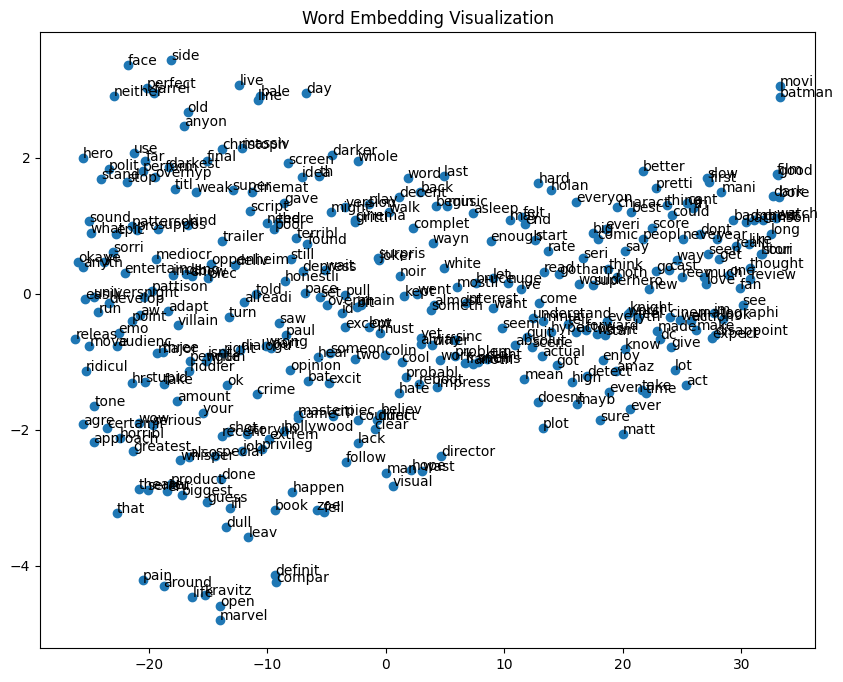

In [119]:
import pandas as pd
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loading the  dataset
df = pd.read_csv('/content/movie_cleaned_review.csv')

# Preprocessing the  text data
def preprocess_text(text):
    words = text.lower().split()
    return words[:8]

# Applying preprocessing to text data
preprocessed_data = df['Cleaned Reviews'].apply(preprocess_text)

# Train Word2Vec model
model = Word2Vec(sentences=preprocessed_data.tolist(), vector_size=300, window=5)

# Visualize the word embeddings
words = list(model.wv.index_to_key)
vectors = model.wv[words]

# Reduce dimensionality for visualization
tsne = TSNE(n_components=2, random_state=42)
word_vectors_2d = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], marker='o')

for i, word in enumerate(words):
    plt.annotate(word, xy=(word_vectors_2d[i, 0], word_vectors_2d[i, 1]))


plt.title('Word Embedding Visualization')
plt.show()


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


https://github.com/suchandra1523/NAGA_SUCHANDRA_TIRUMALASETTI_INFO_5731/blob/main/sentiment_analysis_results.csv

# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [120]:
# Type your answer
"""every question is a good learning experience. It is a bit challenging but learnt new methods"""

'every question is a good learning experience. It is a bit challenging but learnt new methods'